In [5]:
import numpy as np
import matplotlib.pyplot as plt

from functools import reduce

In [91]:
dend_lower = np.load('dend_list_lower.npy', allow_pickle = True)
a_som_lower = np.load('a_soma_list_lower.npy', allow_pickle = True)
b_som_lower = np.load('b_soma_list_lower.npy', allow_pickle = True)

cor_list_dend = np.load('transient_correl_coeffs/cor_list_dendritic.npy', allow_pickle = True)
cor_list_a_soma = np.load('transient_correl_coeffs/cor_list_a_soma.npy', allow_pickle = True)
cor_list_b_soma = np.load('transient_correl_coeffs/cor_list_b_soma.npy', allow_pickle = True)

a_soma = np.load('synthetic_a_soma_signal_smooth.npy', allow_pickle = True)
b_soma = np.load('synthetic_b_soma_signal_smooth.npy', allow_pickle = True)
dendrite = np.load('synthetic_a_dendrite_signal_smooth.npy', allow_pickle = True)

In [102]:
def uncommons(intersect_arr, arr2, arr3):
    intersect_one = np.intersect1d(intersect_arr, arr2)
    intersect_two = np.intersect1d(intersect_arr, arr3)
    common_intersects = np.concatenate((intersect_one, intersect_two), axis = 0)
    intersect_list = list(common_intersects)
    unsorted = list(intersect_arr)
    sorted_uncommons = set(unsorted) - set(intersect_list)
    sorted_uncommons = np.array(list(sorted_uncommons))  
    return sorted_uncommons

In [103]:
sorted_uncommons = uncommons(dend_lower, a_som_lower, b_som_lower)
sorted_uncommons

array([ 2688, 11010, 25571,  6406, 19081, 23884, 23597,  7373,  1807,
       15279, 15214, 16759, 25370, 10813], dtype=int64)

In [104]:
def plot_and_transients(signal, transient_array, uncommon_array, cor_array):

    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(8)
    plt.ylim(1, 2.2)

    len_signal = len(signal)-5
    len_array = len(transient_array)
    len_uncommon_array = len(uncommon_array)

    plt.plot(szignale[0:len_signal], 'r', label = 'T: true transients \nL: local transients')
    plt.legend()

    for i in range(len_array):
        if np.asarray(cor_array[i]) > 0.5:
            plt.text(transient_array[i], 2, 'T', fontsize = 10)

    for j in range(len_uncommon_array):
            plt.text(uncommon_array[j], 1.9, 'L', fontsize = 10)

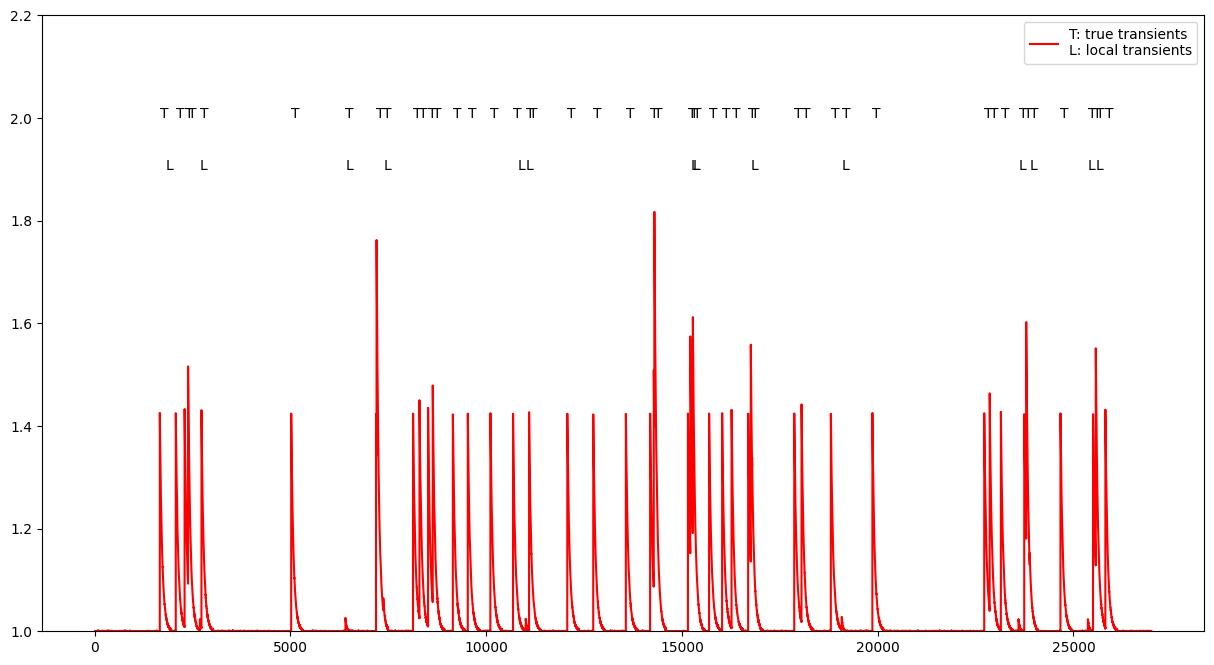

In [105]:
plot_and_transients(dendrite, dend_lower, sorted_uncommons, cor_list_dend)